In [3]:
# Vamos a realiazar la importacion de Datos
import pandas as pd   # Para el Manejo de Datos, es Obligatoria
import matplotlib.pyplot as plt   #Para hacer Graficas
import seaborn as sns  # Muestra Graficas Mas sofisticadas que Matplotlib


In [4]:
# asi vamos a llamar la informacion de la base de datos que tenemos en un archivo .csv usando Pandas.
datos_banco = pd.read_csv("dataset_banco_clean.csv")  # Este Archivo debe estar en la Carpeta del Desarrollo
datos_banco

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45184,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45185,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45186,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45187,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


In [5]:
# Vamos a Iniciar el proceso del Analisis Exploratorio
# primero revisemos cual es el tipo de variable a analizar
datos_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


C:\Users\Edison Quintero\AppData\Local\Temp\ipykernel_10660\3511237805.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Edison Quintero\AppData\Local\Temp\ipykernel_10660\3511237805.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Edison Quintero\AppData\Local\Temp\ipykernel_10660\3511237805.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Edison Quintero\AppData\Local\Temp\ipykernel_10660\3511237805.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fixe

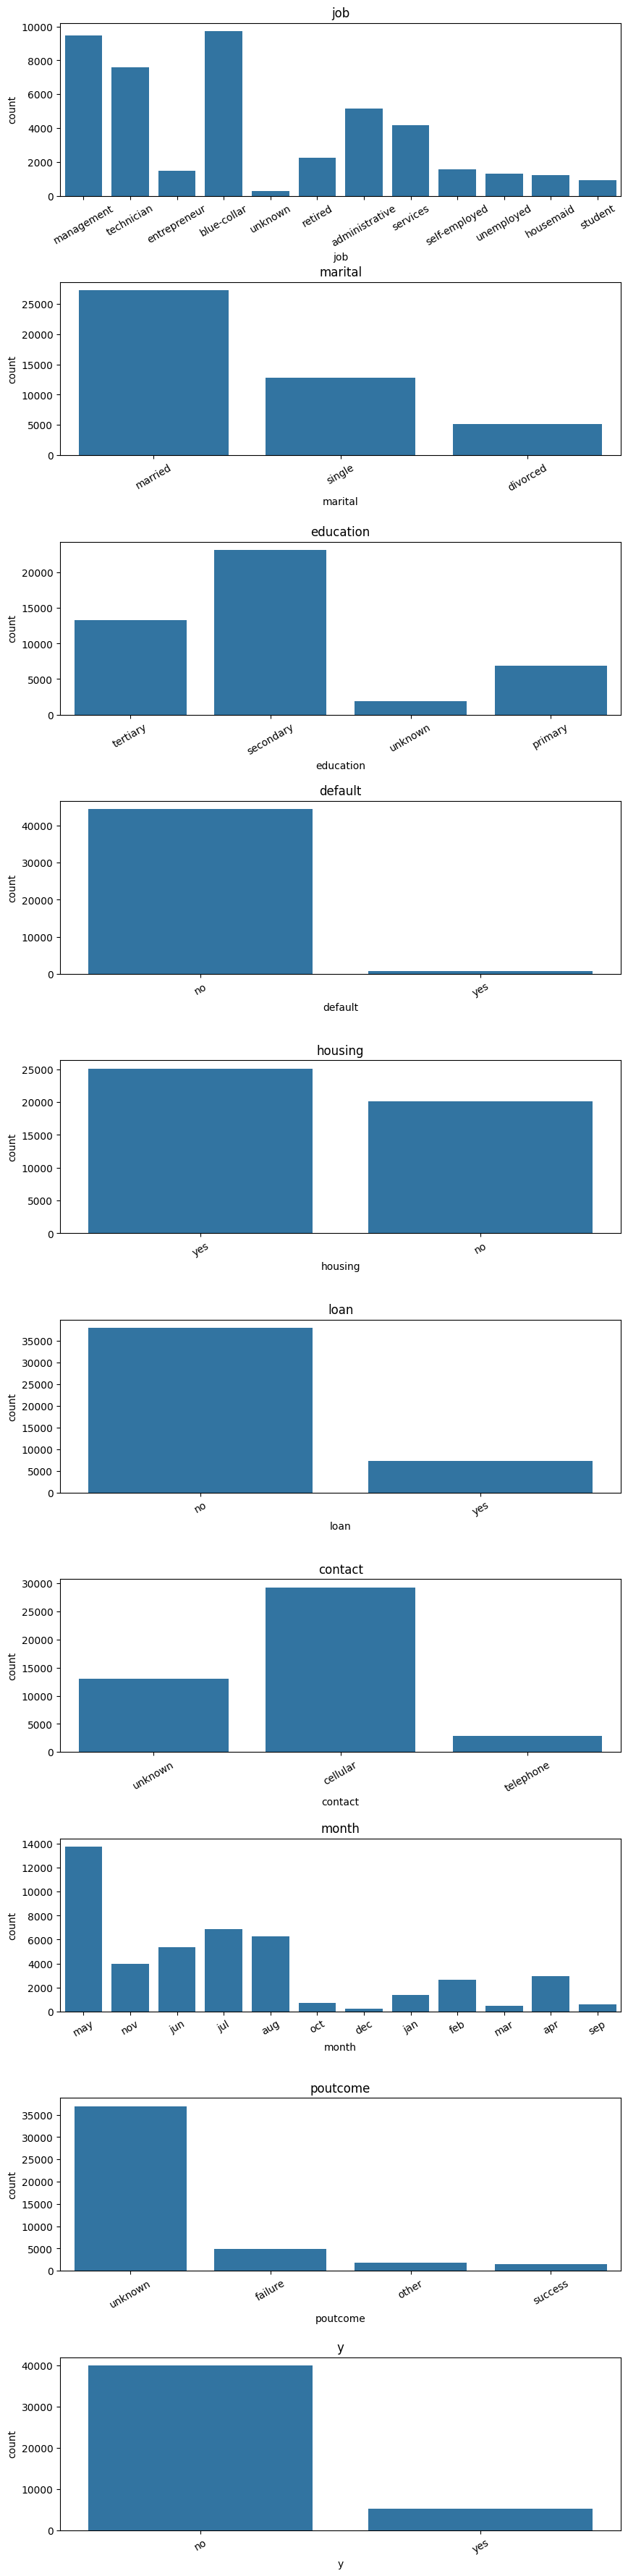

In [11]:
# Definamos cuales son la Variables Categoricas, que son todas Aquellas variables consideradas de TIPO Object
col_cat = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]
# ahora vamos a hacer los graficos de barras 
fig, ax = plt.subplots(nrows=len(col_cat), figsize = (10,45), ncols=1)  # Esta es la grilla para los Graficos
fig.subplots_adjust(hspace=0.5)

# Lo siguiente es para iterar sobre cada una de las columnas categoricas.
for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=datos_banco, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)


# Aqui se puede dar un detalles de lo que se puede ver en este tipo de grafica.


In [12]:
datos_banco.drop(columns=["contact", "month", "day", "duration", "campaign", "pdays", "previous"], inplace=True)
datos_banco.columns
# Se nos muestra las columnas de los datos que quedaron en el DATAFRAME


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'poutcome', 'y'],
      dtype='object')

In [14]:
# vamos ahora a revisar las VAriables que quedaron 
datos_banco.describe()
# ESTE FORMATO SOLO ANALIZA LAS vARIABLES NUMERICAS

,age,balance
count,45189.000000,45189.000000
mean,40.936445,1374.012149
std,10.618502,3924.370039
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,527532.000000


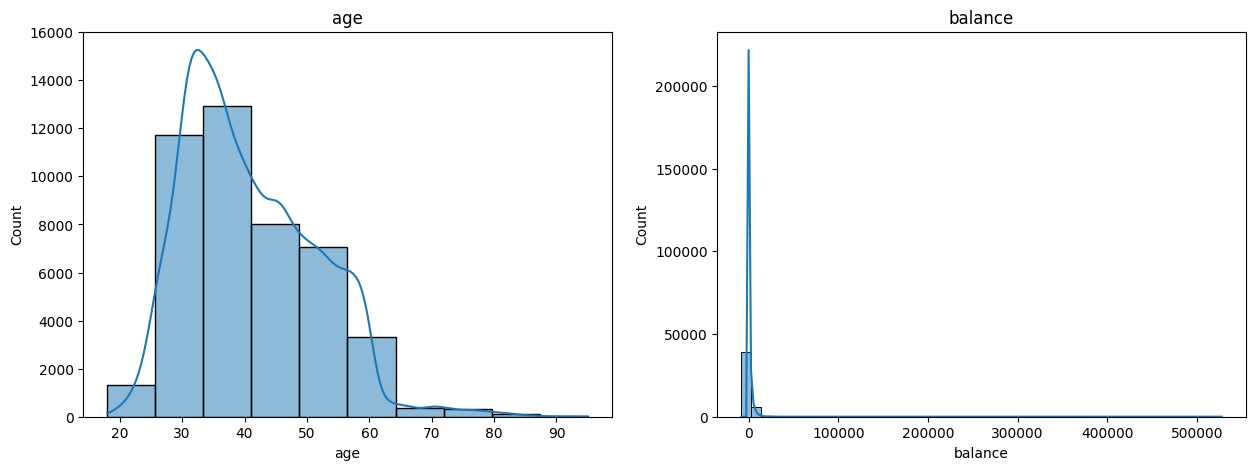

In [16]:
# LAS GRAFICAS POR EXCELENCIA SON LOS HISTOGRAMAS
# Vamos a Dibujar histogramas de esas variables Numericas, que en este caso solo tenemos dos.
col_num =["age", "balance"]
fig,ax =plt.subplots(nrows=1, ncols=2, figsize =(15,5))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(col_num):
    if col == "age":
        nbins = 10
    else:
        nbins=50
    sns.histplot(x=col, data=datos_banco, ax=ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)
# El resultado de las Graficas muestra que la mayor parte de las personas estaban 
# En el rango de edad de 30 y 45 Años *** Forma parte del analisi que se puede realizar.

In [17]:
# Vamos a ver a detalle lo que esta ocurriendo con Balance
datos_banco["balance"].describe()

count     45189.000000
mean       1374.012149
std        3924.370039
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      527532.000000
Name: balance, dtype: float64

In [18]:
# Entonces yes=1  y no=0
# creamos un Diccionario
diccio = {"yes":1 , "no":0}
binario = datos_banco["y"].map(diccio)
datos_banco["y_bin"] = binario  #Se crea una columna llamada y_bin al final que da el valor Binario 1 o 0
datos_banco

,age,job,marital,education,default,balance,housing,loan,poutcome,y,y_bin
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,no,0
1,44,technician,single,secondary,no,29.0,yes,no,unknown,no,0
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,no,0
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,no,0
4,33,unknown,single,unknown,no,1.0,no,no,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...
45184,51,technician,married,tertiary,no,825.0,no,no,unknown,yes,1
45185,71,retired,divorced,primary,no,1729.0,no,no,unknown,yes,1
45186,72,retired,married,secondary,no,5715.0,no,no,success,yes,1
45187,57,blue-collar,married,secondary,no,668.0,no,no,unknown,no,0
